# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


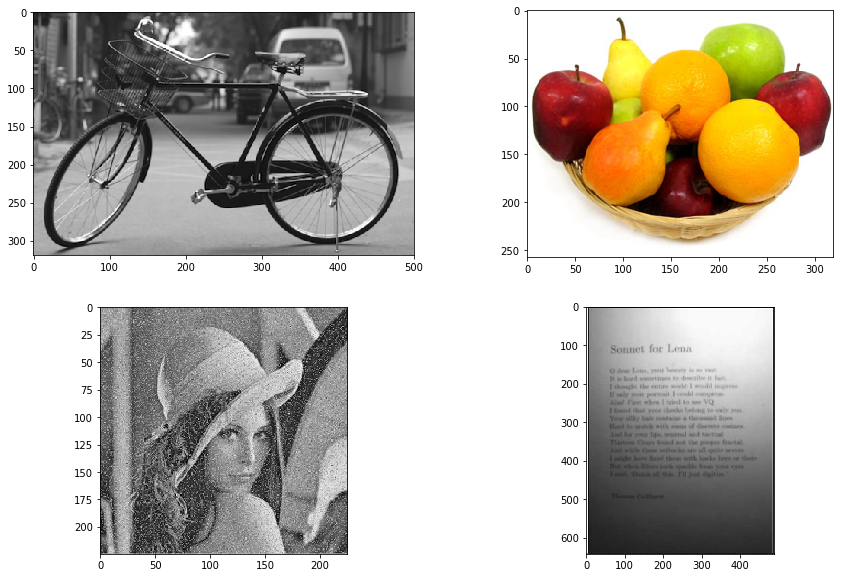

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


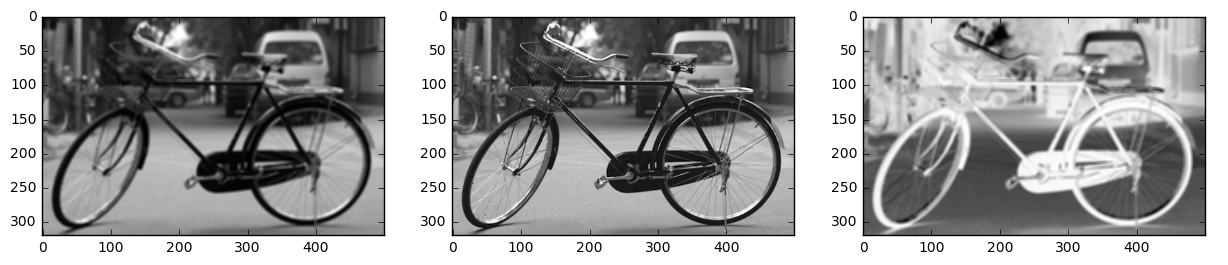

In [2]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')


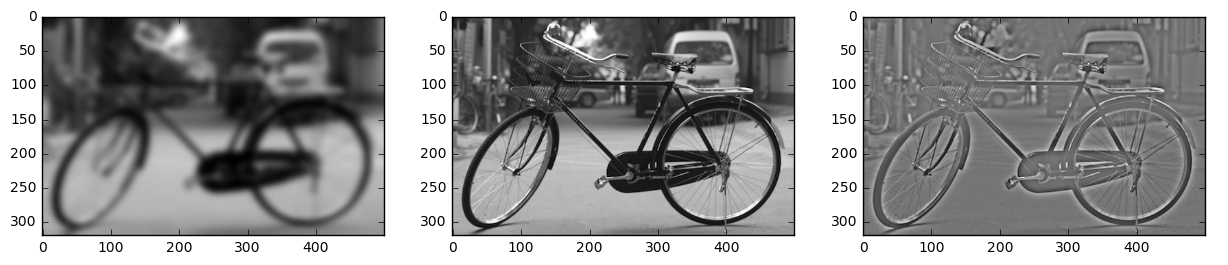

In [4]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

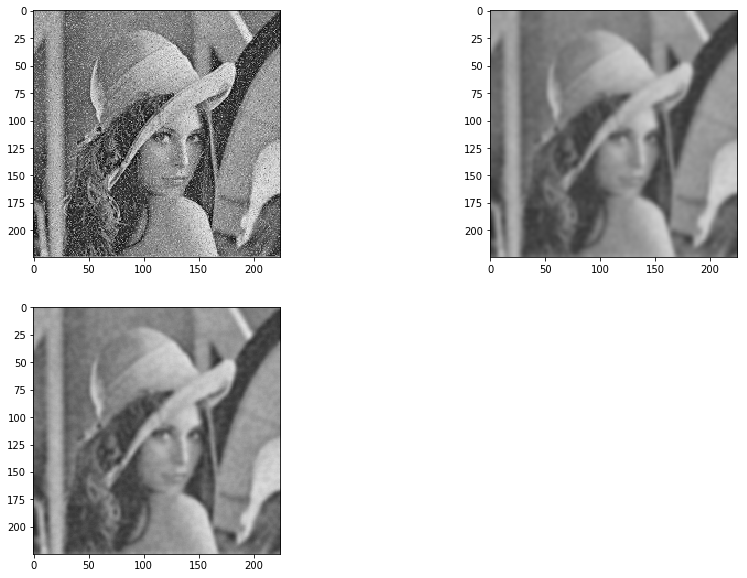

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import misc
from scipy import ndimage

plt.figure(figsize=(15,10))

imlen = img.imread('./lena.jpg')
blurred_f = ndimage.gaussian_filter(imlen, 2)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 3
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.subplot(221)
plt.imshow(imlen)

plt.subplot(222)
plt.imshow(blurred_f)

plt.subplot(223)
plt.imshow(sharpened)

plt.show()

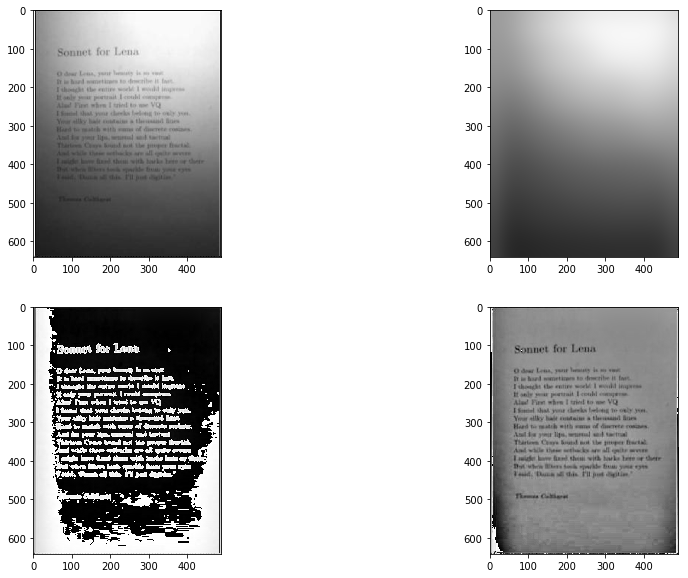

In [28]:
# Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)G(x, y, sigma)],
# where G - gaussian, sigma - coef of blurring, - convolution remapping of image from (-1,1) to (0,255) 
# with I = 255*I + 127

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import misc
from scipy import ndimage

plt.figure(figsize=(15,10))

imbook = img.imread('./book.png')
gaussed = ndimage.gaussian_filter(imbook, sigma=30)

plt.subplot(221)
plt.imshow(imbook)

plt.subplot(222)
plt.imshow(gaussed, cmap='gray')

plt.subplot(223)
plt.imshow((imbook - gaussed), cmap='gray')

Max = (imbook - gaussed).max()
Min = (imbook - gaussed).min()

res = np.log2(imbook) - np.log2(gaussed)
newbook = (res - Min) / (Max - Min)

plt.subplot(224)
plt.imshow(newbook, cmap='gray')

plt.show()
